In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from os import listdir
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib._color_data as mcd

In [2]:
emb_dir = './embeddings/radius_2.0'
emb_list = listdir(emb_dir)
emb_list.sort()

In [3]:
vectors, labels = [], []
for label in emb_list:
    loaded = np.load(join(emb_dir,label), allow_pickle=True)

    for e in loaded:
        vectors.append(e.detach().numpy()[0])
        labels.append(label[:-4])

x = np.asarray(vectors)

In [4]:
# Normalize Data
x_norm = StandardScaler().fit_transform(x) # normalizing the features

print('Untouched:\t ', np.mean(x),'\t', np.std(x))
print('Normalized:\t ', np.mean(x_norm),'\t', np.std(x_norm))
x_norm.shape

Untouched:	  0.50067055 	 0.073979214
Normalized:	  -1.0525927e-08 	 1.0


(3760, 1280)

In [6]:

pca = PCA(n_components=3)
components_ear = pca.fit_transform(x_norm)

ear_df = pd.DataFrame(data = components_ear, index = labels, columns = ['component 1', 'component 2', 'component 3'],)


ear_df.head()

,component 1,component 2,component 3
alexander_bec,-2.897579,-8.432852,12.079643
alexander_bec,-7.278638,-5.762906,12.076126
alexander_bec,-4.215930,-11.224472,10.930299
alexander_bec,-6.226910,-5.715581,12.380113
alexander_bec,1.519284,-8.938171,2.300376


In [7]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.42371827 0.2932285  0.2630762 ]


In [8]:
# Only for creating colors
ear_df['label'] = pd.Categorical(labels)
# my_color = ear_df['label'].cat.codes
# ear_df = ear_df.drop('persons', 1)

In [9]:
unique = list(set(labels))
unique.sort()

cluster_center = dict()
for person in unique:
    cluster_center[person] = (sum(ear_df.loc[person, 'component 1'])/80, sum(ear_df.loc[person, 'component 2'])/80, sum(ear_df.loc[person, 'component 3'])/80)

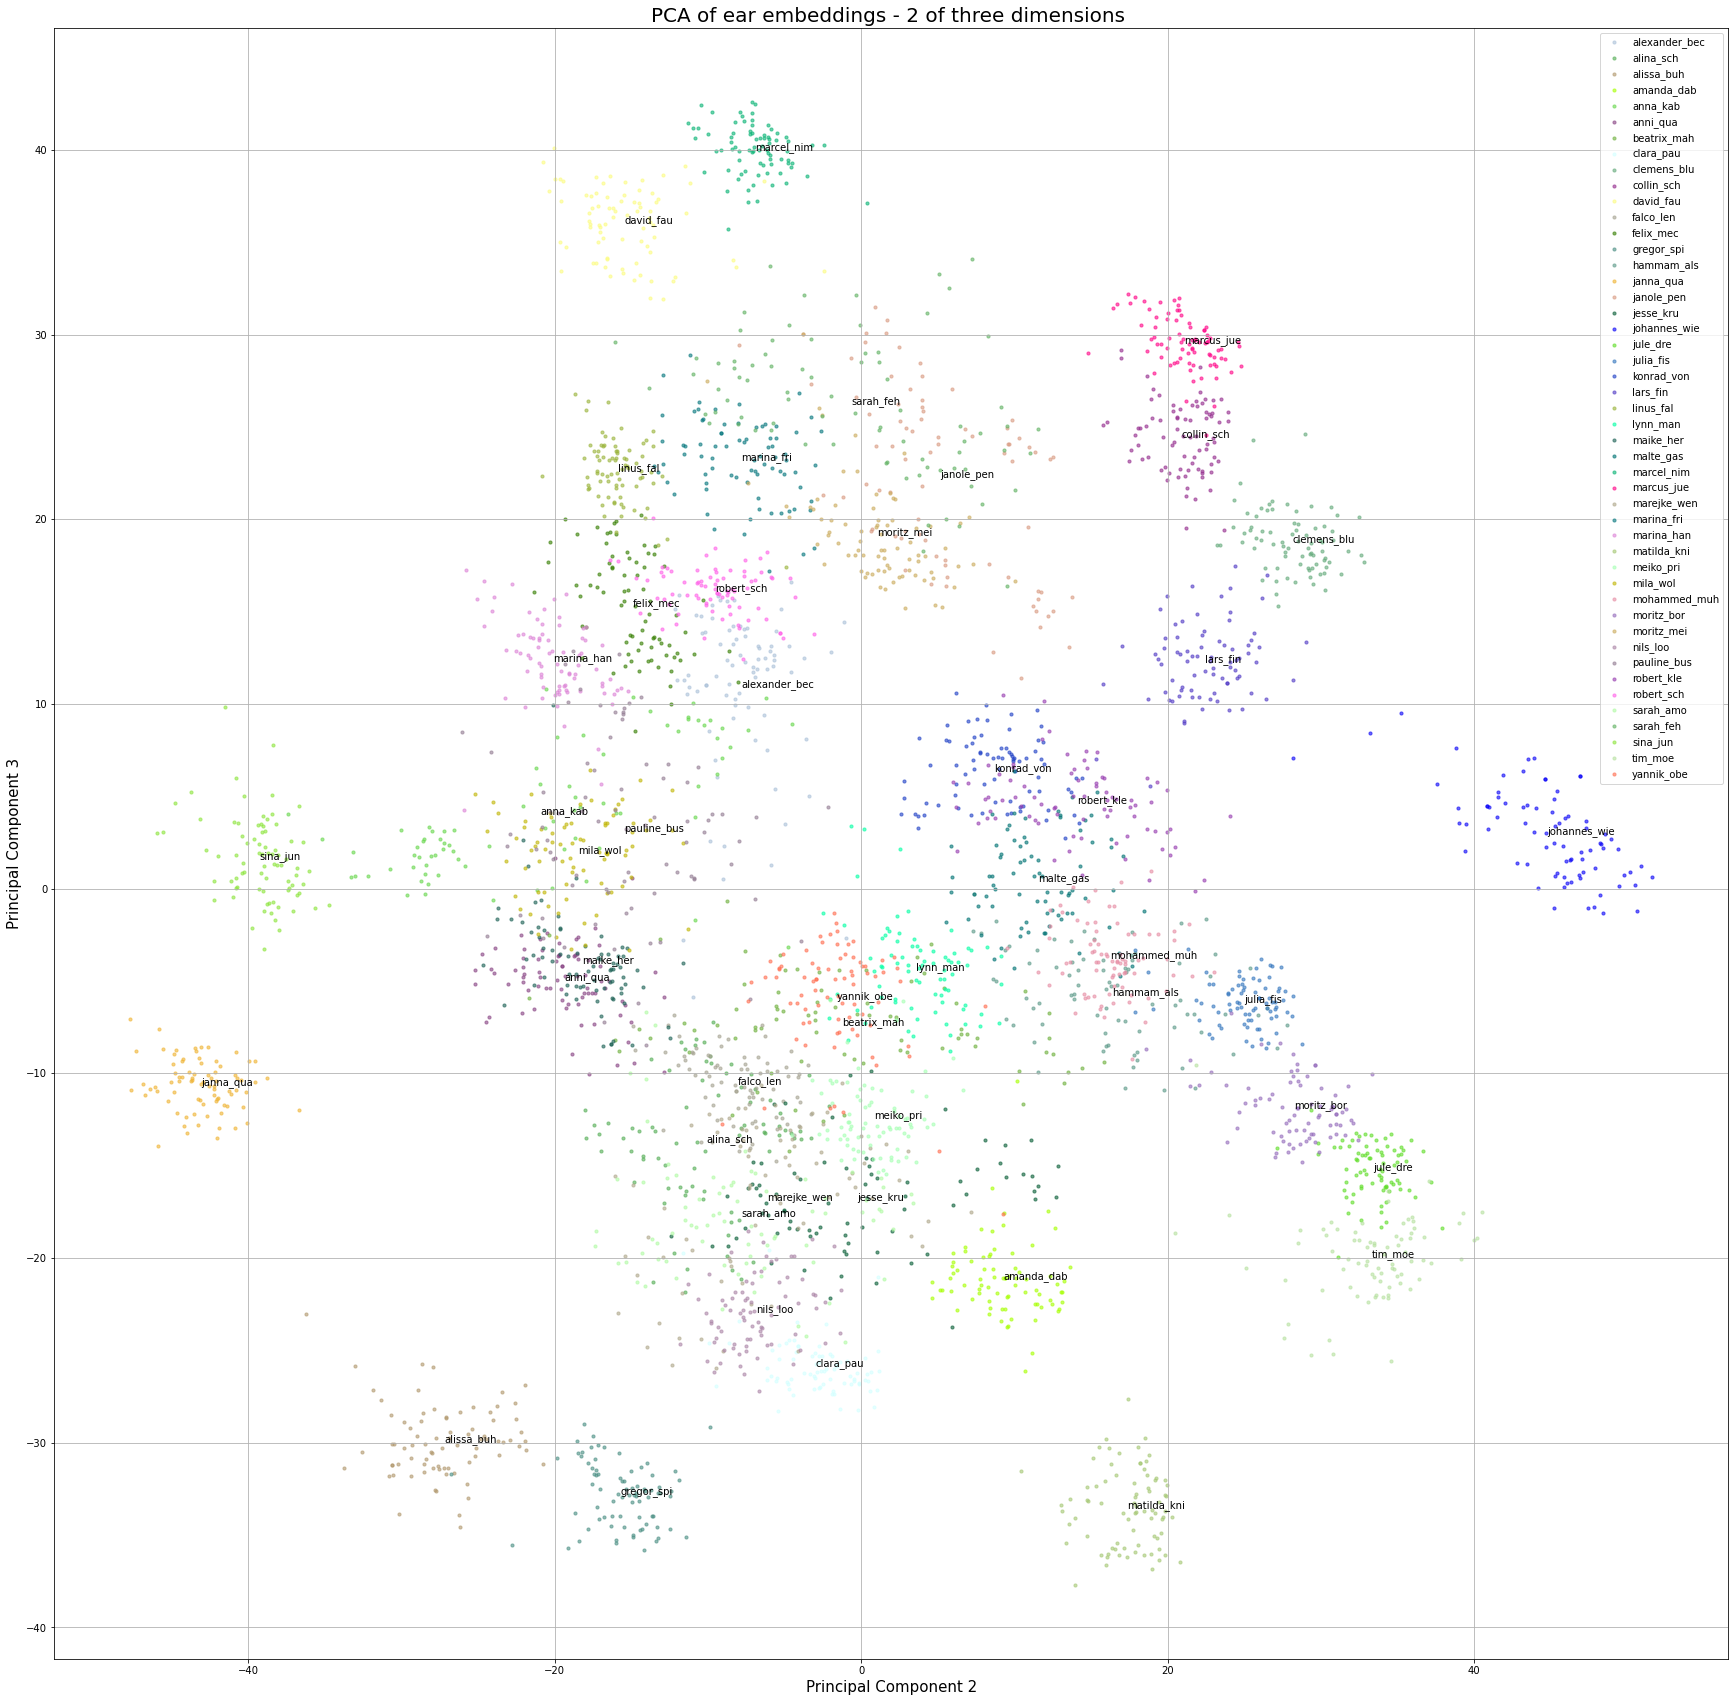

In [16]:
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA of ear embeddings - 2 of three dimensions ', fontsize = 20)
targets = unique
colors = list(mcd.XKCD_COLORS.values())
for target, color in zip(targets,colors):
    indicesToKeep = ear_df['label'] == target
    # ax.scatter(x=cluster_center[target][0], y=cluster_center[target][1], s=5, c='red', marker='*')
    ax.scatter(ear_df.loc[indicesToKeep, 'component 2']
               , ear_df.loc[indicesToKeep, 'component 3']
               , c = color
               , s = 10
               , alpha=0.6)
    ax.annotate(s=target, xy=(cluster_center[target][1], cluster_center[target][2]), textcoords='data' )
ax.legend(targets)
ax.grid()

In [ ]:
cluster_center

In [26]:
def sort_dict_by_component(dictionary, component, reverse=False):
    '''Function to sort the cluster center dictionary by the component
    Arguments
    ----------
    component: 1, 2 or 3 representing the 3 dimensions
    reverse: default is false, returning an ascending order

    Returns
    ----------
    sorted_reduced: a list containing the tuples of (key, component) of specified component
    '''

    assert component>=1 and component<=3
    # change to array space
    component -= 1

    sorted_values = sorted(dictionary.items(), key=lambda x: x[1][component], reverse=reverse)

    sorted_reduced = [(label, values[component]) for (label, values) in sorted_values]
    return sorted_reduced

In [48]:
## Set component 1, 2 or 3
c = 1
sort_values = sort_dict_by_component(cluster_center, c)
print('These are the values of the component ', c, '\n')
for l,v in sort_values:
    print('{:>20} : {:<}'.format(l,v))


These are the values of the component  1 

          marina_han : -47.19684519767761
           falco_len : -43.18334074020386
        mohammed_muh : -42.17377853393555
          moritz_bor : -41.10601124763489
            nils_loo : -30.148878169059753
          moritz_mei : -29.834996366500853
           linus_fal : -28.741048049926757
            lars_fin : -26.41714279651642
          robert_sch : -17.279261523485182
         pauline_bus : -17.025281530618667
          alissa_buh : -15.09559708237648
            sina_jun : -14.200839745998383
           malte_gas : -13.511414116621017
          hammam_als : -11.929451268911361
        johannes_wie : -11.860056859254836
          gregor_spi : -9.65692813694477
         matilda_kni : -8.167535728216171
          marcel_nim : -8.08319756090641
           meiko_pri : -7.974357907474041
          marcus_jue : -7.392051631212235
             tim_moe : -5.736537618143484
       alexander_bec : -4.514291377738118
          konrad_von : -3.